<a href="https://colab.research.google.com/github/kavyakapoor200/recommendation-system/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
events_df = pd.read_csv('events.csv')
item_properties_df = pd.read_csv('item_properties.csv')
category_tree_df = pd.read_csv('category_tree.csv')

# Display the first few rows of each DataFrame
print("Events DataFrame:")
print(events_df.head())

print("\nItem Properties DataFrame:")
print(item_properties_df.head())

print("\nCategory Tree DataFrame:")
print(category_tree_df.head())


Events DataFrame:
       timestamp  visitorid event    itemid  transactionid
0  1433221332117   257597.0  view  355908.0            NaN
1  1433224214164   992329.0  view  248676.0            NaN
2  1433221999827   111016.0  view  318965.0            NaN
3  1433221955914   483717.0  view  253185.0            NaN
4  1433221337106   951259.0  view  367447.0            NaN

Item Properties DataFrame:
       timestamp    itemid    property                            value
0  1435460400000  460429.0  categoryid                             1338
1  1441508400000  206783.0         888          1116713 960601 n277.200
2  1439089200000  395014.0         400  n552.000 639502 n720.000 424566
3  1431226800000   59481.0         790                       n15360.000
4  1431831600000  156781.0         917                           828513

Category Tree DataFrame:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.

In [ ]:
import pandas as pd

# Load the Events DataFrame
events_path = 'events.csv'
events_df = pd.read_csv(events_path)

# Convert the timestamp to a readable date-time format
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], unit='ms')
print(events_df['timestamp'].min(), events_df['timestamp'].max())


# Display the first few rows to verify the conversion
print("Events DataFrame after timestamp conversion:")
print(events_df.head())

# Check for missing values
print("\nMissing values in Events DataFrame:")
print(events_df.isnull().sum())

# Handle missing values (Example: Dropping rows with missing values)
events_df.dropna(inplace=True)

# Display the shape of the DataFrame after dropping missing values
print("\nShape of Events DataFrame after dropping missing values:")
print(events_df.shape)

print(events_df['event'].value_counts())

# Check for missing values in the events DataFrame
print(events_df.isnull().sum())

# Check for unique values in the 'event' column
print(events_df['event'].unique())



events_df.to_csv('cleaned_events.csv', index=False)



1974-07-26 02:52:17.288000 2015-08-24 05:59:50.291000
Events DataFrame after timestamp conversion:
                timestamp  visitorid event    itemid  transactionid
0 2015-06-02 05:02:12.117   257597.0  view  355908.0            NaN
1 2015-06-02 05:50:14.164   992329.0  view  248676.0            NaN
2 2015-06-02 05:13:19.827   111016.0  view  318965.0            NaN
3 2015-06-02 05:12:35.914   483717.0  view  253185.0            NaN
4 2015-06-02 05:02:17.106   951259.0  view  367447.0            NaN

Missing values in Events DataFrame:
timestamp              0
visitorid              1
event                  1
itemid                 1
transactionid    1003572
dtype: int64

Shape of Events DataFrame after dropping missing values:
(8322, 5)
event
transaction    8322
Name: count, dtype: int64
timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64
['transaction']


In [ ]:
# Load the Item Properties DataFrame
item_properties_path = 'item_properties.csv'
item_properties_df = pd.read_csv(item_properties_path)

# Convert the timestamp to a readable date-time format
item_properties_df['timestamp'] = pd.to_datetime(item_properties_df['timestamp'], unit='ms')
print(events_df['timestamp'].min(), events_df['timestamp'].max())

# Display the first few rows to verify the conversion
print("Item Properties DataFrame after timestamp conversion:")
print(item_properties_df.head())

# Check for missing values
print("\nMissing values in Item Properties DataFrame:")
print(item_properties_df.isnull().sum())

# Handle missing values (Example: Dropping rows with missing values)
item_properties_df.dropna(inplace=True)

# Display the shape of the DataFrame after dropping missing values
print("\nShape of Item Properties DataFrame after dropping missing values:")
print(item_properties_df.shape)

print(item_properties_df['itemid'].nunique())
print(item_properties_df['property'].value_counts())


2015-06-01 06:16:28.863000 2015-08-24 05:24:36.422000
Item Properties DataFrame after timestamp conversion:
            timestamp    itemid    property                            value
0 2015-06-28 03:00:00  460429.0  categoryid                             1338
1 2015-09-06 03:00:00  206783.0         888          1116713 960601 n277.200
2 2015-08-09 03:00:00  395014.0         400  n552.000 639502 n720.000 424566
3 2015-05-10 03:00:00   59481.0         790                       n15360.000
4 2015-05-17 03:00:00  156781.0         917                           828513

Missing values in Item Properties DataFrame:
timestamp    0
itemid       1
property     1
value        1
dtype: int64

Shape of Item Properties DataFrame after dropping missing values:
(652036, 4)
276937
property
888           96350
790           57794
available     48083
categoryid    25235
6             20503
              ...  
877               1
427               1
353               1
1072              1
507             

In [ ]:
# Load the Category Tree DataFrame
category_tree_path = 'category_tree.csv'
category_tree_df = pd.read_csv(category_tree_path)

# Display the first few rows to understand the structure
print("Category Tree DataFrame:")
print(category_tree_df.head())

# Check for missing values
print("\nMissing values in Category Tree DataFrame:")
print(category_tree_df.isnull().sum())

# Handle missing values (Example: Dropping rows with missing values)
category_tree_df.dropna(inplace=True)

# Display the shape of the DataFrame after dropping missing values
print("\nShape of Category Tree DataFrame after dropping missing values:")
print(category_tree_df.shape)


Category Tree DataFrame:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0

Missing values in Category Tree DataFrame:
categoryid     0
parentid      25
dtype: int64

Shape of Category Tree DataFrame after dropping missing values:
(1644, 2)


In [ ]:
# Load the Item Properties DataFrame
item_properties_path = 'item_properties.csv'
item_properties_df = pd.read_csv(item_properties_path)

# Ensure 'property' column exists
if 'property' in item_properties_df.columns:
    # Filter out non-numeric values in 'property' column
    item_properties_df = item_properties_df[pd.to_numeric(item_properties_df['property'], errors='coerce').notnull()]

    # Convert the 'property' column to int64
    item_properties_df['property'] = item_properties_df['property'].astype('int64')
else:
    raise KeyError("'property' column not found in item_properties_df")

# Verify the conversion
print("Data types in item_properties_df:")
print(item_properties_df.dtypes)

# Ensure 'itemid' exists in events_df and item_properties_df
if 'itemid' in events_df.columns and 'itemid' in item_properties_df.columns:
    # Merge events_df with item_properties_df on 'itemid'
    merged_df = pd.merge(events_df, item_properties_df, on='itemid', how='left')
else:
    raise KeyError("'itemid' column not found in one or both DataFrames (events_df or item_properties_df)")

# Ensure 'categoryid' exists in category_tree_df and 'property' exists in merged_df
if 'categoryid' in category_tree_df.columns and 'property' in merged_df.columns:
    # Merge the result with category_tree_df on 'property' and 'categoryid'
    final_df = pd.merge(merged_df, category_tree_df, left_on='property', right_on='categoryid', how='left')
else:
    raise KeyError("'categoryid' column not found in category_tree_df or 'property' not found in merged_df")

# Display the first few rows of the integrated DataFrame
print("Integrated DataFrame:")
print(final_df.head())

# Specify the file name and path where you want to save the CSV
output_file = 'final_df.csv'

# Save the DataFrame to a CSV file
final_df.to_csv(output_file, index=False)

print(f"DataFrame saved to {output_file}")



<ipython-input-142-cd2e69e07212>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_properties_df['property'] = item_properties_df['property'].astype('int64')


Data types in item_properties_df:
timestamp      int64
itemid       float64
property       int64
value         object
dtype: object
Integrated DataFrame:
              timestamp_x  visitorid        event    itemid  transactionid  \
0 2015-06-02 05:17:56.276   599528.0  transaction  356475.0         4000.0   
1 2015-06-01 21:18:20.981   121688.0  transaction   15335.0        11117.0   
2 2015-06-01 21:25:15.008   552148.0  transaction   81345.0         5444.0   
3 2015-06-01 16:38:56.375   102019.0  transaction  150318.0        13556.0   
4 2015-06-01 16:38:56.375   102019.0  transaction  150318.0        13556.0   

    timestamp_y  property                          value  categoryid  parentid  
0  1.439694e+12     591.0                        1116693       591.0     933.0  
1           NaN       NaN                            NaN         NaN       NaN  
2           NaN       NaN                            NaN         NaN       NaN  
3  1.441508e+12     790.0                     n67080.

In [ ]:
# Basic statistics of the integrated DataFrame
print("Summary Statistics of Integrated DataFrame:")
print(final_df.describe())


Summary Statistics of Integrated DataFrame:
                         timestamp_x     visitorid         itemid  \
count                          18392  1.839200e+04   18392.000000   
mean   2015-07-08 23:12:34.581532672  7.014243e+05  236507.757558   
min       2015-06-01 06:16:28.863000  1.720000e+02      19.000000   
25%    2015-06-15 00:04:09.396999936  3.442710e+05  122585.250000   
50%    2015-06-25 17:08:54.599000064  7.055420e+05  243087.000000   
75%    2015-08-09 17:06:10.739749888  1.075423e+06  353433.750000   
max       2015-08-24 05:24:36.422000  1.407110e+06  466614.000000   
std                              NaN  4.056781e+05  135332.601192   

       transactionid   timestamp_y     property    categoryid      parentid  
count   18392.000000  1.569100e+04  15691.00000  15458.000000  15458.000000  
mean     8823.220748  1.435862e+12    663.57345    664.998836   1028.000259  
min         0.000000  1.431227e+12      0.00000      0.000000      8.000000  
25%      4351.500000  


Distribution of Events:
event
transaction    18392
Name: count, dtype: int64


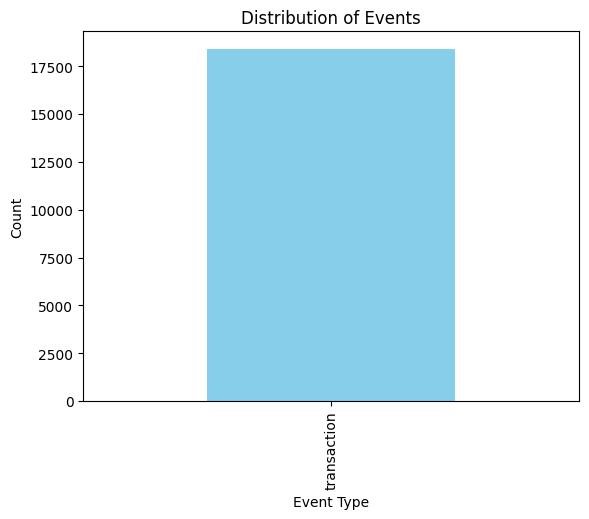

In [ ]:
# Distribution of different types of events
event_counts = final_df['event'].value_counts()
print("\nDistribution of Events:")
print(event_counts)

# Visualize the distribution of events
import matplotlib.pyplot as plt

event_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribution of Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'final_df.csv'  # Adjust to the correct file path
final_df = pd.read_csv(file_path)
print(final_df.shape)

# Check for missing values
print("Missing values:", final_df.isnull().sum())
#drop the missing values
final_df.dropna(inplace=True)
#the final shape of final.df
print("\nShape of final_df after dropping missing values:")
print(final_df.shape)

print("Missing values:", final_df.isnull().sum())






(18392, 10)
Missing values: timestamp_x         0
visitorid           0
event               0
itemid              0
transactionid       0
timestamp_y      2701
property         2701
value            2701
categoryid       2934
parentid         2934
dtype: int64

Shape of final_df after dropping missing values:
(15458, 10)
Missing values: timestamp_x      0
visitorid        0
event            0
itemid           0
transactionid    0
timestamp_y      0
property         0
value            0
categoryid       0
parentid         0
dtype: int64


In [ ]:
# If there are multiple interactions with the same item by a user, we aggregate them
final_df['interaction_weight'] = final_df['interaction_weight'].fillna(0)  # Ensure no NaN values

# Aggregate interactions (sum or max based on your preference)
final_df = final_df.groupby(['visitorid', 'itemid'], as_index=False).agg({
    'interaction_weight': 'sum'  # You can also use 'max' if you prefer to keep the highest interaction value
})

# Verify the aggregation
print(final_df.head())
# Save the final data to a CSV file
final_df.to_csv('final_df_a.csv', index=False)

# Confirm the file is saved
print("Aggregated data saved to 'final_df_a.csv'")



   visitorid    itemid  interaction_weight
0      172.0   10034.0                   1
1      172.0  465522.0                   1
2      539.0   94371.0                   1
3      627.0  414182.0                   1
4      795.0  207825.0                   1
Aggregated data saved to 'final_df_a.csv'


In [216]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

# Load your dataset
df = pd.read_csv('final_df_a.csv')  # Adjust the file path as needed

# Create the interaction matrix (visitorid vs itemid)
interaction_matrix = pd.pivot_table(df, values='interaction_weight',
                                   index='visitorid', columns='itemid',
                                   aggfunc='sum', fill_value=0)

# Convert the interaction matrix to sparse format
sparse_matrix = coo_matrix(interaction_matrix.values)



In [222]:
# Ensure the sparse matrix is in float type
sparse_matrix = sparse_matrix.astype(float)

# Perform SVD
U, sigma, Vt = svds(sparse_matrix, k=100)  # You can adjust k for the rank of decomposition

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# Reconstruct the predicted matrix
predicted_matrix = np.dot(U, np.dot(sigma, Vt))

# Convert the predicted matrix back to a DataFrame
predicted_df = pd.DataFrame(predicted_matrix, columns=interaction_matrix.columns, index=interaction_matrix.index)


In [247]:
def get_top_n_recommendations(visitor_id, predicted_df, N=3):
    # Get the predicted ratings for the visitor
    visitor_predicted_ratings = predicted_df.loc[visitor_id].sort_values(ascending=False)

    # Get the top N recommended items
    top_n_items = visitor_predicted_ratings.head(N).index.tolist()

    return top_n_items

# Example: Get top 3 recommendations for visitor 57905
visitor_id = 57905
recommended_items = get_top_n_recommendations(visitor_id, predicted_df, N=3)
print(f"Top 3 recommended items for visitor {visitor_id}: {recommended_items}")


Top 3 recommended items for visitor 57905: [428257.0, 341009.0, 338395.0]


In [248]:
from sklearn.metrics import precision_score, recall_score, f1_score

# List of items the user actually interacted with (ground truth)
actual_interacted_items = [62275,138196,267416,338395,341009,428257,459583]

# List of items recommended by the system
recommended_items = [428257.0, 341009.0, 338395.0]

# Convert both lists to sets for easier comparison
actual_set = set(actual_interacted_items)
recommended_set = set(recommended_items)

# Calculate Precision
# True Positives = intersection of actual_interacted_items and recommended_items
tp = len(actual_set.intersection(recommended_set))
fp = len(recommended_set) - tp
precision = tp / (tp + fp) if tp + fp != 0 else 0

# Calculate Recall
# False Negatives = actual_interacted_items not in recommended_items
fn = len(actual_set) - tp
recall = tp / (tp + fn) if tp + fn != 0 else 0

# Calculate F1-Score
f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

# Calculate Hit Ratio
hit_ratio = 1 if tp > 0 else 0  # If at least one item was recommended, it counts as a hit

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Hit Ratio: {hit_ratio:.4f}")



Precision: 1.0000
Recall: 0.4286
F1-Score: 0.6000
Hit Ratio: 1.0000
